### Projeto_1
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

##### 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
##### 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
##### 3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda?
##### 4. Quais seriam as sugestões de mudanças?
##### 5. Qual o incremento no preço dado por cada opção de reforma?

fonte:
https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/
https://www.kaggle.com/harlfoxem/housesalesprediction

### Variable | Description
1. Id:Unique ID for each home sold
2. Date: Date of the home sale
3. Price: Price of each home sold
4. Bedrooms: Number of bedrooms
5. Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. Sqft_living: Square footage of the apartments interior living space
7. Sqft_lot: Square footage of the land space
8. Floors: Number of floors
9. Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
10. View: An index from 0 to 4 of how good the view of the property was
11. Condition: An index from 1 to 5 on the condition of the apartment,
12. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. Sqft_above: The square footage of the interior housing space that is above ground level
14. Sqft_basement: The square footage of the interior housing space that is below ground level
15. Yr_built: The year the house was initially built
16. Yr_renovated: The year of the house’s last renovation
17. Zipcode: What zipcode area the house is in
18. Lat: Lattitude
19. Long: Longitude
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Valores que estão faltando

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Transformando a data

In [8]:
df['date']= pd.to_datetime( df['date'] ,format="%Y/%m/%d")

In [9]:
df['month_sold'] = df['date'].dt.month

In [10]:
df.drop('date', axis=1,inplace=True)

# Analisando o preço

/home/felipe/anaconda3/envs/house/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


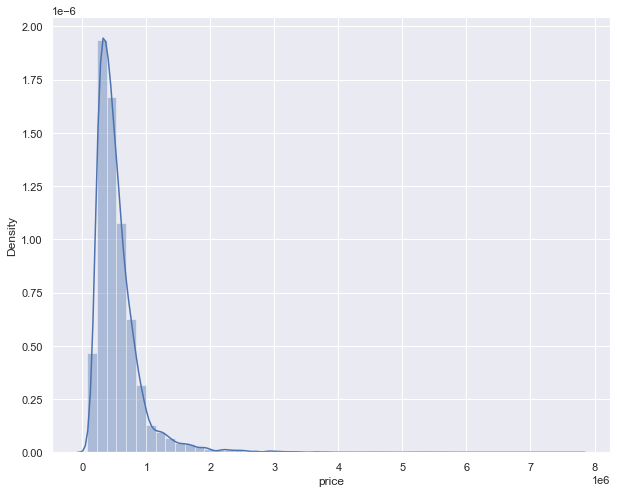

In [11]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.distplot(df['price']);

# Analisando as features

# Procurando outliers
* Bedrooms
* Bathrooms
* Floors
* Waterfront
* View
* Condition
* grade

Text(0.5, 1.0, 'Procurando outliers')

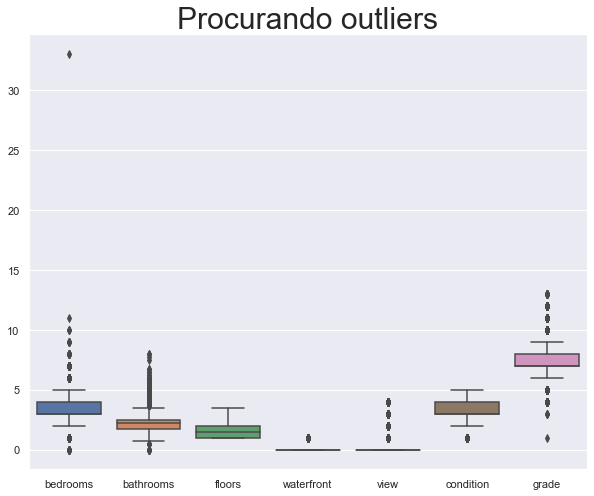

In [12]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.boxplot(data = df.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]).set_title('Procurando outliers',size=30)

# Procurando outliers
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* sqft_living15
* sqft_lot15

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

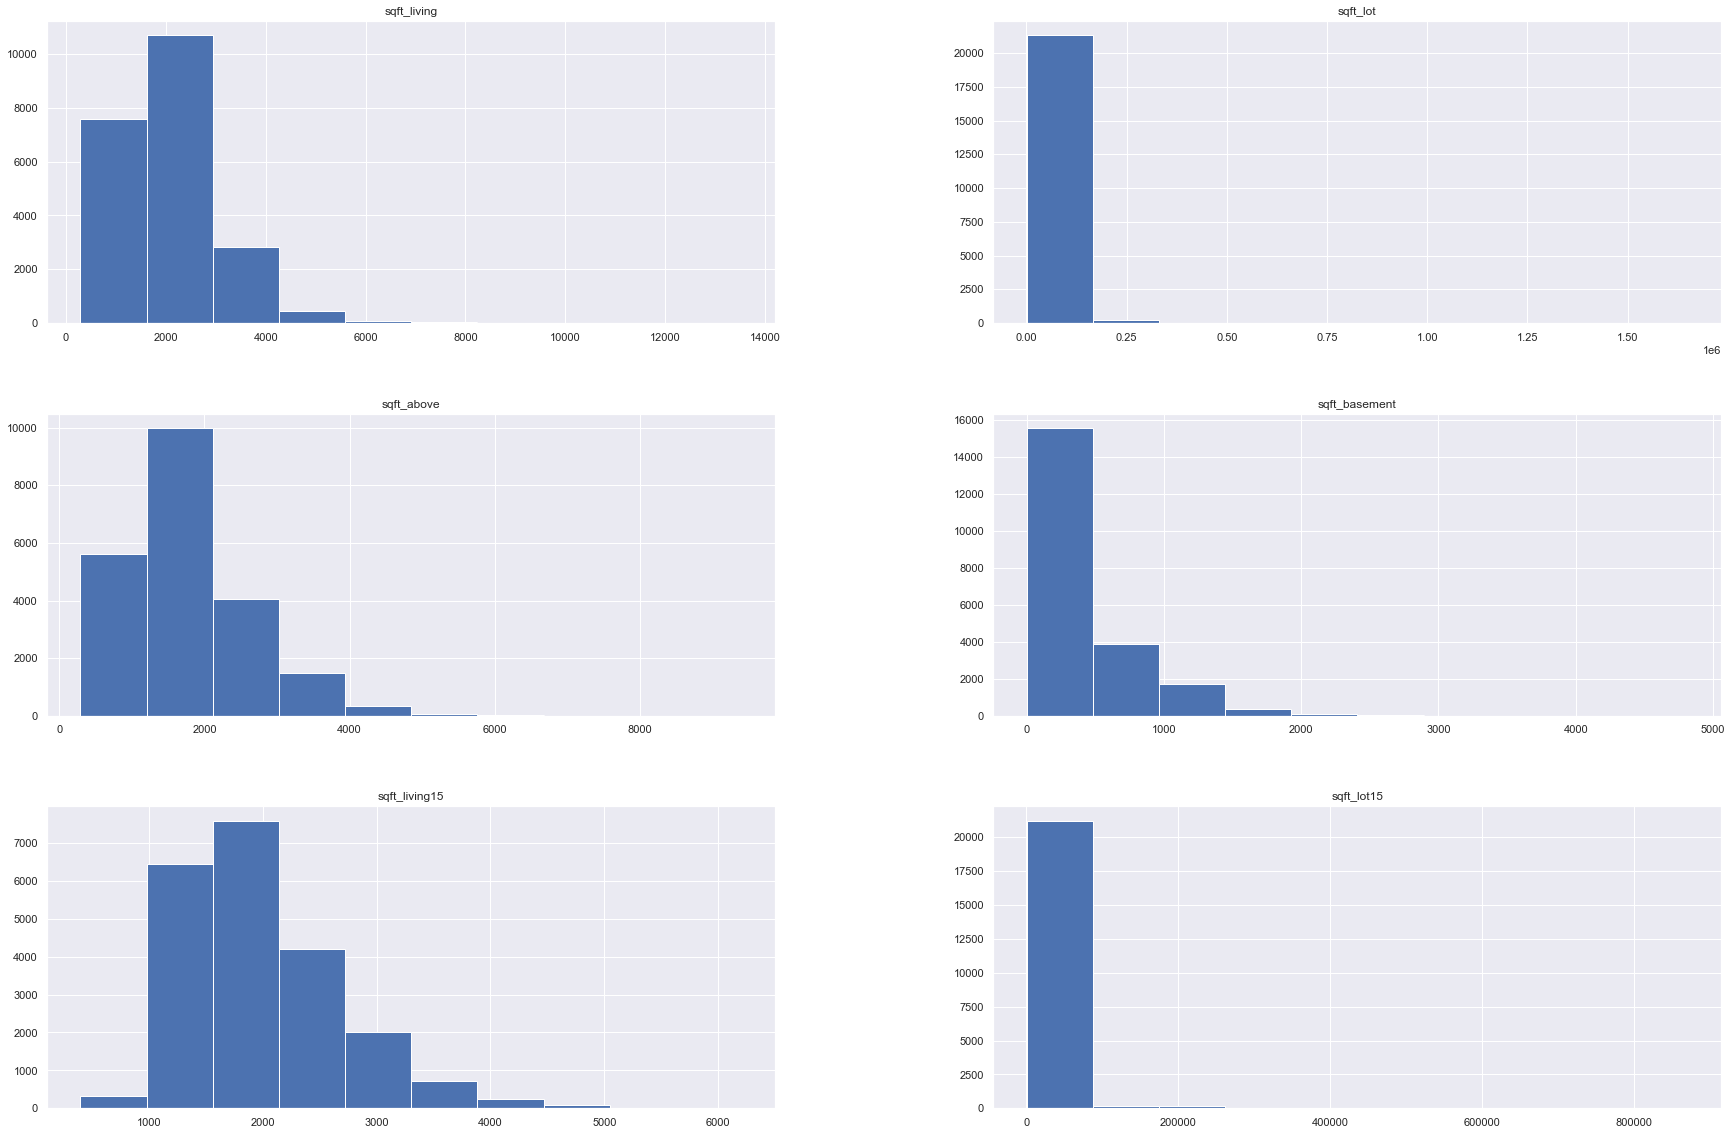

In [13]:
df.loc[:,['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].hist(figsize=(30 ,20))

In [14]:
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [15]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [16]:
df['reformada']= np.zeros(df.shape[0])
for i in df[df['yr_renovated']!=0].index:
    df.loc[i,'reformada'] =1

In [17]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reformada
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,1.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,0.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,0.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,0.0


## bedrooms

In [18]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Outlier

In [19]:
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reformada
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,0.0


In [20]:
df.loc[15870,'bedrooms'] =3

##  bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Casas sem banheiro

In [22]:
df[df['bathrooms']==0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reformada
875,6306400140,1095000.0,0,0.0,3064,4764,3.5,0,2,3,...,0,1990,0,98102,47.6362,-122.322,2360,4000,6,0.0
1149,3421079032,75000.0,1,0.0,670,43377,1.0,0,0,3,...,0,1966,0,98022,47.2638,-121.906,1160,42882,2,0.0
3119,3918400017,380000.0,0,0.0,1470,979,3.0,0,2,3,...,0,2006,0,98133,47.7145,-122.356,1470,1399,2,0.0
5832,5702500050,280000.0,1,0.0,600,24501,1.0,0,0,2,...,0,1950,0,98045,47.5316,-121.749,990,22549,11,0.0
6994,2954400190,1295650.0,0,0.0,4810,28008,2.0,0,0,3,...,0,1990,0,98053,47.6642,-122.069,4740,35061,6,0.0
9773,3374500520,355000.0,0,0.0,2460,8049,2.0,0,0,3,...,0,1990,0,98031,47.4095,-122.168,2520,8050,4,0.0
9854,7849202190,235000.0,0,0.0,1470,4800,2.0,0,0,3,...,0,1996,0,98065,47.5265,-121.828,1060,7200,12,0.0
10481,203100435,484000.0,1,0.0,690,23244,1.0,0,0,4,...,0,1948,0,98053,47.6429,-121.955,1690,19290,9,0.0
14423,9543000205,139950.0,0,0.0,844,4269,1.0,0,0,4,...,0,1913,0,98001,47.2781,-122.250,1380,9600,4,0.0
19452,3980300371,142000.0,0,0.0,290,20875,1.0,0,0,1,...,0,1963,0,98024,47.5308,-121.888,1620,22850,9,0.0


In [23]:
df.drop(df[df['bathrooms']==0].index, inplace=True)

# Correlação

<AxesSubplot:>

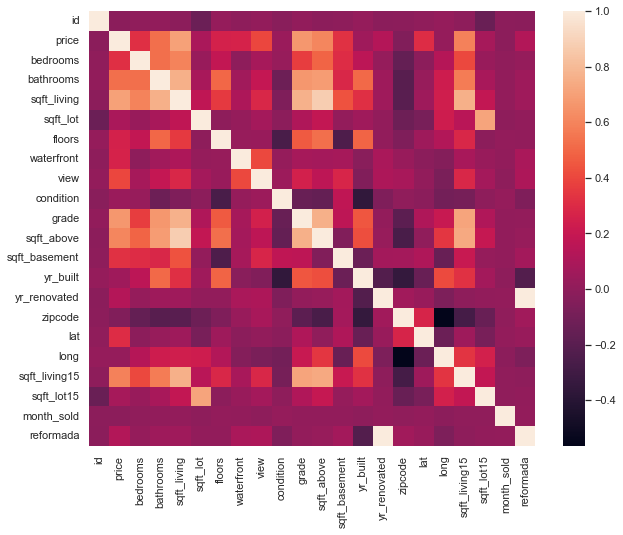

In [24]:
sns.heatmap(df.corr())

In [25]:
df.corr()['price']

id              -0.016674
price            1.000000
bedrooms         0.316061
bathrooms        0.525885
sqft_living      0.701914
sqft_lot         0.089698
floors           0.256618
waterfront       0.266435
view             0.397344
condition        0.036202
grade            0.667836
sqft_above       0.605371
sqft_basement    0.323863
yr_built         0.053850
yr_renovated     0.126446
zipcode         -0.053431
lat              0.306815
long             0.022051
sqft_living15    0.585209
sqft_lot15       0.082490
month_sold      -0.010075
reformada        0.126105
Name: price, dtype: float64

### Retirando colunas (baixo correalção).

In [26]:
#df.drop(['id','lat','long','yr_renovated'], axis=1, inplace=True)

In [27]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reformada
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,1.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,0.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,0.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,0.0


# Preparação dos dados

In [28]:
def prepare_data(df,target,test_size):
    X = df.drop(target, axis=1)
    y = df.loc[:,target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test]
    return response

In [29]:
X_train, X_test , Y_train, Y_test = prepare_data(df ,'price', 0.2)

# Pipeline

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression(normalize=True))])

In [31]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LinearRegression(normalize=True))])

In [32]:
pipe.score(X_train, Y_train)

0.6989270410688384

In [33]:
pipe.score(X_test, Y_test) 

0.7150917264747916

In [34]:
LR = LinearRegression(normalize=True)

In [35]:
LR.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [36]:
y_pred_train = LR.predict(X_train)

In [37]:
df_graf = pd.DataFrame({'Atual': Y_train, 'Predito': y_pred_train})
df_graf

,Atual,Predito
3200,178000.0,303667.098676
5139,700000.0,554832.320803
13733,338900.0,366325.418964
19737,450000.0,345410.814659
6851,470101.0,721028.711643
...,...,...
13131,339950.0,314038.323482
19658,839704.0,802229.416405
9851,890000.0,704164.076190
10807,729000.0,765843.031317


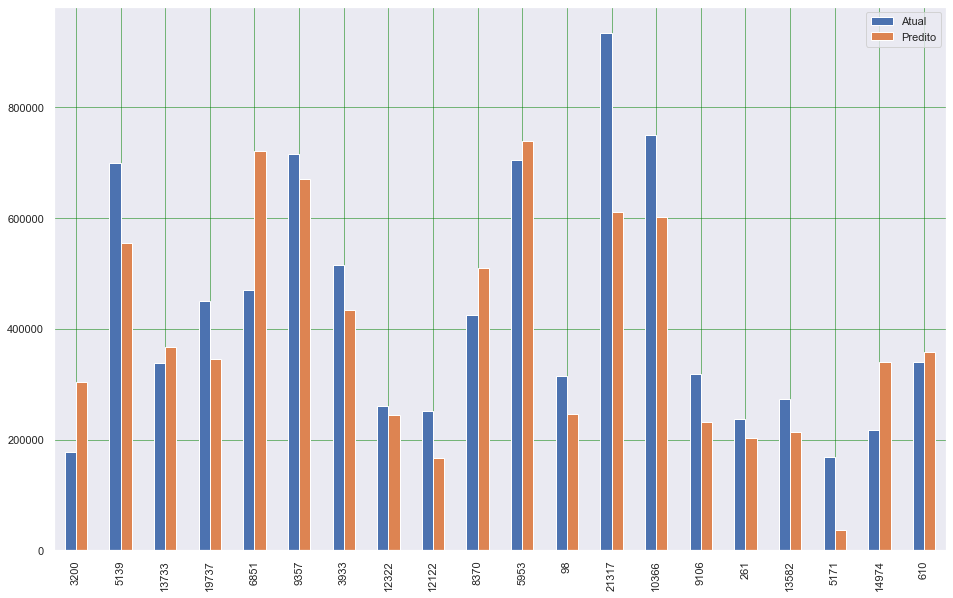

In [38]:
df1 = df_graf.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Melhorando o desempenho